# Inferential statistics.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_pickle("../data/train_data_wrangle.plk")

## Generate a heatmap to find correlations.

Text(0.5,1,'Heat map (correlations) between features.')

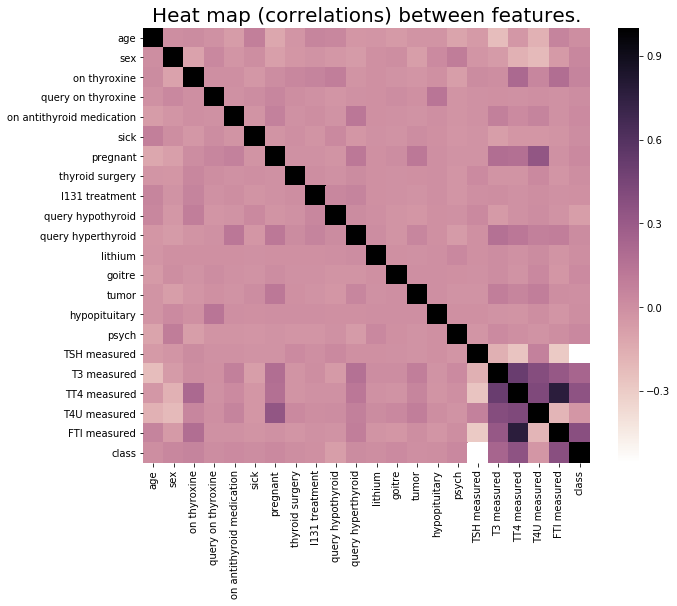

In [3]:
f, ax = plt.subplots(figsize=(10,8))
corr = train_df.corr()
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
sns.heatmap(corr, cmap=cmap)
ax.set_title('Heat map (correlations) between features.', fontsize=20)

## Looking at the heatmap we see correlations.
### Bottom right of the heat map we see a mix of positive and negative correlations.

## Let's explore some statistical inferences.

### We see correlation between TT4 measured and FTI measured and do statistical inferences.

Null Hypothesis H0: The correlation between TT4 measured and FTI measured for a patient is zero.

Alternate Hypothesis Ha: The correlation between TT4 measured and FTI measured for a patient is greater than zero.

For the statistic to be significant we observe the p-value, if p-value less than 0.05 (5%) we reject the null hypothesis.

In [4]:
def ecdf(data):
    """compute ecdf"""
    return np.sort(data), np.arange(1, len(data)+1)/len(data)

### Let's look at the distributions for TT4 measured, FTI measured.

In [5]:
x_tt4, y_tt4 = ecdf(train_df['TT4 measured'])
theoretical_tt4 = np.random.normal(np.mean(train_df['TT4 measured']), np.std(train_df['TT4 measured']), size=10000)
x_theo_tt4, y_theo_tt4 = ecdf(theoretical_tt4)

x_fti, y_fti = ecdf(train_df['FTI measured'])
theoretical_fti = np.random.normal(np.mean(train_df['FTI measured']), np.std(train_df['FTI measured']), size=10000)
x_theo_fti, y_theo_fti = ecdf(theoretical_fti)

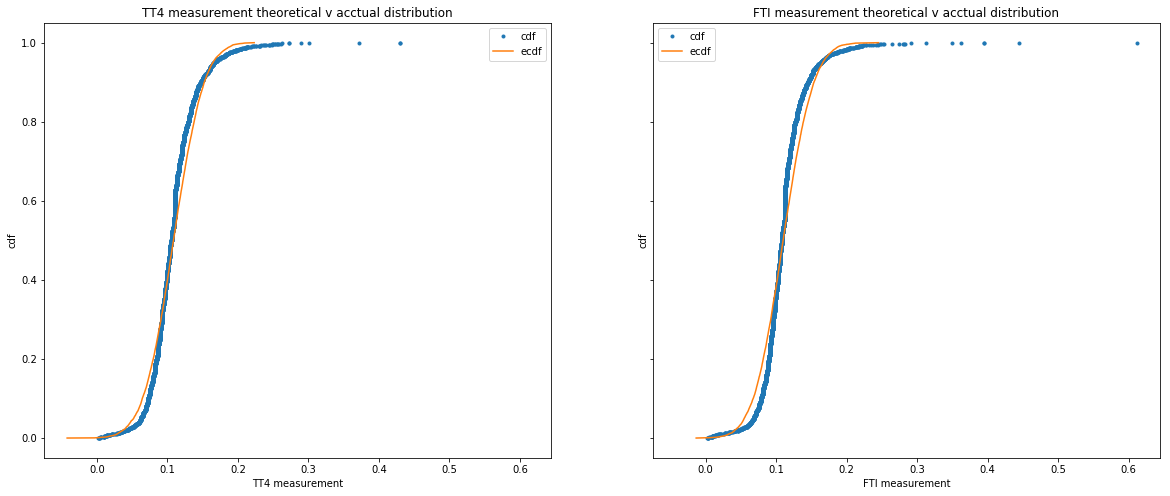

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8), sharex=True, sharey=True)

ax1.plot(x_tt4, y_tt4, marker='.',linestyle='none')
ax1.plot(x_theo_tt4,y_theo_tt4)
ax1.set_xlabel('TT4 measurement')
ax1.set_ylabel('cdf')
ax1.set_title('TT4 measurement theoretical v acctual distribution')
ax1.legend(('cdf','ecdf'))

ax2.plot(x_fti, y_fti, marker='.',linestyle='none')
ax2.plot(x_theo_fti,y_theo_fti)
ax2.set_xlabel('FTI measurement')
ax2.set_ylabel('cdf')
ax2.set_title('FTI measurement theoretical v acctual distribution')
ax2.legend(('cdf','ecdf'))

plt.show()

### Visually not all points lie on the theoretical distribution.
### Perform a normal test and check whether the distribution is normal or not.

In [7]:
# normal test
from scipy import stats
n_stat, n_pval = stats.normaltest(train_df['TT4 measured'])
is_normal = 'not normal' if (n_pval < 0.01) else 'normal'
print('TT4 measured is',is_normal,'distribution.')

n_stat, n_pval = stats.normaltest(train_df['FTI measured'])
is_normal = 'not normal' if (n_pval < 0.01) else 'normal'
print('FTI measured is',is_normal,'distribution.')

TT4 measured is not normal distribution.
FTI measured is not normal distribution.


### Now check the correlation between TT4 measured and FTI measured.

In [8]:
tt4 = train_df['TT4 measured']
fti = train_df['FTI measured']
corr_tt4_fti = tt4.corr(fti)
print('correlation between TT4 measured and FTI measured is', corr_tt4_fti,', and it is',
      'positive' if(corr_tt4_fti > 0.0) else 'negative','correlation.')

correlation between TT4 measured and FTI measured is 0.771332135049 , and it is positive correlation.


### We have a positive correlation between TT4 measured and FTI measured, which means it has a significant positive  relation.
### Perform different tests to check for statistical significance.

In [9]:
statistic, pval = stats.ttest_ind(tt4,fti)
print('p value is',pval)

p value is 0.0170801224785


In [10]:
# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(tt4,fti)
#print(slope, intercept, r_value, p_value, std_err)
print('\np value is',p_value)


p value is 0.0


### From the above tests, we see the p value is zero (or less than 0.05) and we can reject the null hypothesis.

## (Ha) The correlation between TT4 measured and FTI measured is greater than zero.